In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("dataset/Maternal Health Risk Data Set.csv")
dfx = pd.read_csv("dataset/Maternal Health Risk Data Set.csv")
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [3]:
df['RiskLevel'] = df['RiskLevel'].map({'low risk': 0, 'mid risk': 1, 'high risk': 2})
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,2
1010,55,120,90,18.0,98.0,60,2
1011,35,85,60,19.0,98.0,86,2
1012,43,120,90,18.0,98.0,70,2


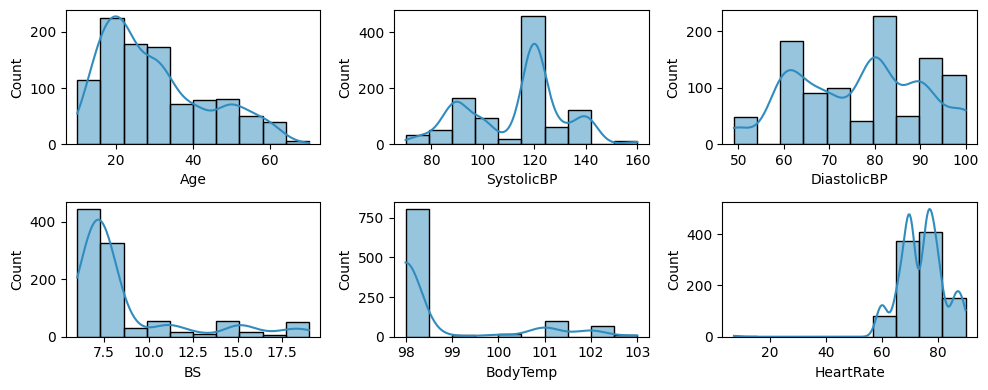

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(10, 4))

features = list(df.columns)[:6]  # Select the first 6 features or adjust as needed

for i in range(2):
    for j in range(3):
        feat = features[i * 3 + j]
        sns.histplot(ax=axes[i, j], data=df, x=feat, bins=10, kde=True, color='#308CBE')

plt.tight_layout()
plt.savefig("dist.png", format='png', dpi=300)
plt.show()

In [5]:
import numpy as np

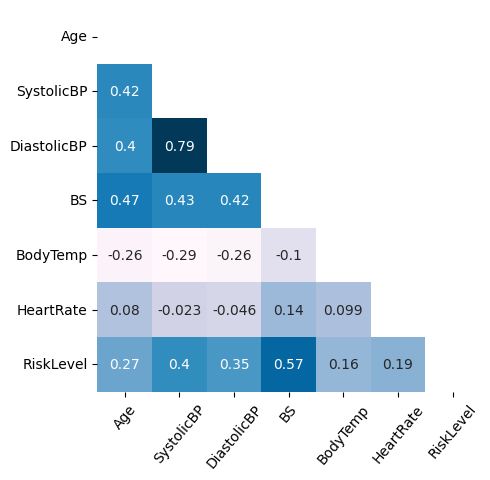

In [6]:
correlation = df.corr()

mask = np.triu(np.ones_like(correlation, dtype=bool))
plt.figure(figsize=(5,5))
ax_ = sns.heatmap(correlation, cmap="PuBu", annot=True, annot_kws={"size":10}, mask=mask, cbar=False)

plt.tight_layout()
plt.xticks(rotation=50)
plt.savefig("corr.png", format='png', dpi=300)
ax_.tick_params(axis='both', which='major', labelsize=10)

In [7]:
X = df.drop("RiskLevel", axis=1)
y = pd.DataFrame(df["RiskLevel"]).copy()

In [8]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.20, random_state=42)

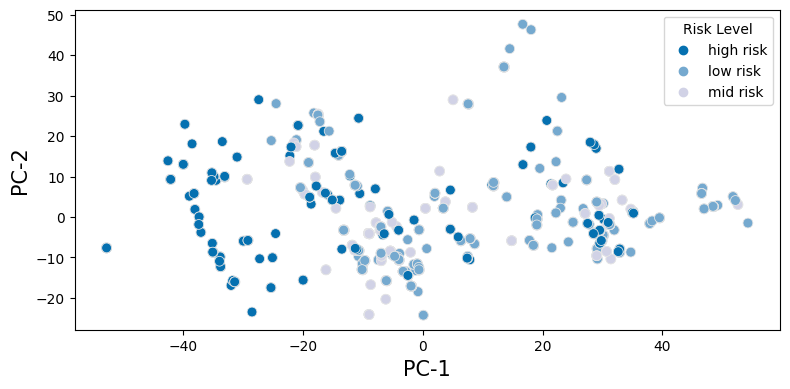

In [10]:
from sklearn.decomposition import PCA 
import seaborn as sns

pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X)
X_train_pca = pd.DataFrame(X_train_pca, columns = ["PC-1", "PC-2"])
yy = pd.DataFrame(y)

y_train_pca = pd.DataFrame(dfx, columns=["RiskLevel"]).merge(X_train_pca, how="inner", left_index=True, right_index=True)

fig, ax = plt.subplots(figsize=(8, 4))
scatter = sns.scatterplot(x="PC-1", y="PC-2", data=y_train_pca, s=50, hue="RiskLevel", palette="PuBu_r", ax=ax, edgecolor='#E6E6E6')
ax.legend(loc='upper right')
scatter.set_xlabel("PC-1", fontsize=15)
scatter.set_ylabel("PC-2", fontsize=15)
leg = plt.legend(fontsize=10)
leg.set_title("Risk Level", prop={'size': 10})
plt.tight_layout()
plt.savefig("pca.png", format='png', dpi=300)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [12]:
classifiers = [
    ("SVM", SVC()),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("AdaBoost", AdaBoostClassifier(random_state=42)),
    ("Naive Bayes", KNeighborsClassifier())
]

# Iterate through each classifier
for clf_name, clf in classifiers:
    # Fit the model on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    
    # Print the classification report
    print(f"Classification Report for {clf_name}:\n")
    print(classification_report(y_test, y_pred, digits=4))
    print("="*50)

Classification Report for SVM:

              precision    recall  f1-score   support

           0     0.5248    0.9250    0.6697        80
           1     0.6129    0.2500    0.3551        76
           2     0.9032    0.5957    0.7179        47

    accuracy                         0.5961       203
   macro avg     0.6803    0.5902    0.5809       203
weighted avg     0.6454    0.5961    0.5631       203

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0     0.8592    0.7625    0.8079        80
           1     0.7442    0.8421    0.7901        76
           2     0.8696    0.8511    0.8602        47

    accuracy                         0.8128       203
   macro avg     0.8243    0.8186    0.8194       203
weighted avg     0.8185    0.8128    0.8134       203

Classification Report for AdaBoost:

              precision    recall  f1-score   support

           0     0.7250    0.7250    0.7250        80
           1     0

In [13]:
class_counts = df['RiskLevel'].value_counts()
print(class_counts)

0    406
1    336
2    272
Name: RiskLevel, dtype: int64


In [14]:
# Define the hyperparameter grid to search

clf = LGBMClassifier(random_state=42)
param_dist = {
    'n_estimators': sp_randint(50, 500),  # Number of boosting rounds
    'max_depth': sp_randint(3, 15),       # Maximum depth of trees
    'learning_rate': np.linspace(0.01, 0.3, 100),  # Learning rate
    'subsample': np.linspace(0.2, 1.0, 100),      # Subsample ratio
    'colsample_bytree': np.linspace(0.2, 1.0, 100),  # Feature subsample ratio
}

# Create a random search object
random_search = RandomizedSearchCV(
    clf,
    param_distributions=param_dist,
    n_iter=100,  # Number of random combinations to try
    scoring='accuracy',  # Use an appropriate scoring metric
    cv=10,  # Number of cross-validation folds
    n_jobs=-1,  # Use all available CPU cores
    verbose=1,
    random_state=42
)

# Perform the random search on the data
random_search.fit(X_train, y_train)
print(random_search.score(X_test, y_test))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000078 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 118
[LightGBM] [Info] Number of data points in the train set: 811, number of used features: 6
[LightGBM] [Info] Start training from score -0.911371
[LightGBM] [Info] Start training from score -1.137586
[LightGBM] [Info] Start training from score -1.282168
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

In [18]:
random_search.best_estimator_

LGBMClassifier(colsample_bytree=0.5878787878787879,
               learning_rate=0.2736363636363636, max_depth=13, n_estimators=219,
               random_state=42, subsample=0.9353535353535354)

In [15]:
y_pred = random_search.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import lightgbm as lgb
import seaborn as sns

print(classification_report(y_test, y_pred, digits=4))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
              precision    recall  f1-score   support

           0     0.8590    0.8375    0.8481        80
           1     0.8312    0.8421    0.8366        76
           2     0.8542    0.8723    0.8632        47

    accuracy                         0.8473       203
   macro avg     0.8481    0.8506    0.8493       203
weighted avg     0.8475    0.8473    0.8473       203



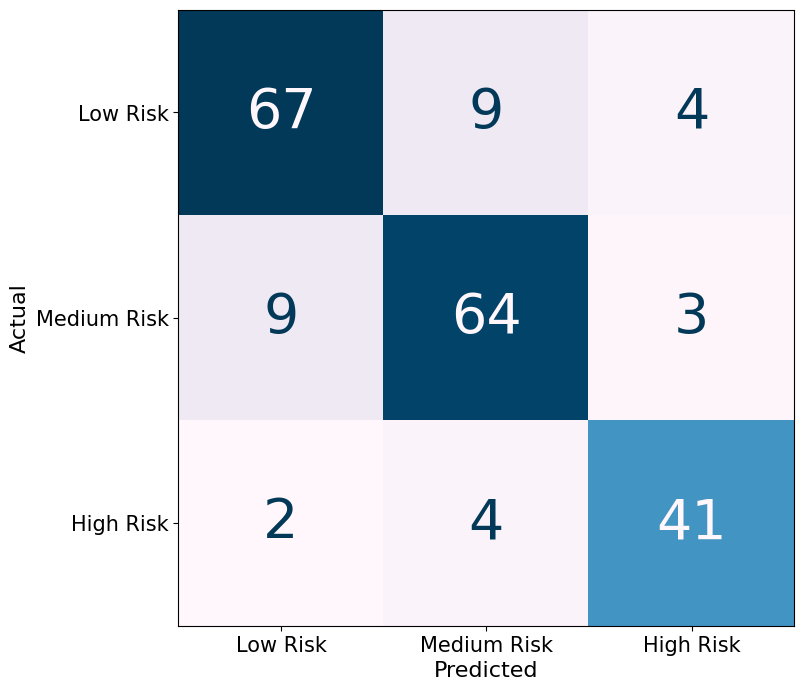

In [16]:
conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix_display = ConfusionMatrixDisplay(conf_matrix)

fig, ax = plt.subplots(figsize=(8, 8))
conf_matrix_display.plot(ax=ax, colorbar=False, cmap="PuBu")

for label in conf_matrix_display.text_.ravel():
    label.set_fontsize(40)

ax.set_xlabel("Predicted", fontsize=16)
ax.set_ylabel("Actual", fontsize=16)
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Low Risk', 'Medium Risk', 'High Risk'], fontsize=15)
ax.set_yticks([0, 1, 2])
ax.set_yticklabels(['Low Risk', 'Medium Risk', 'High Risk'], fontsize=15)
plt.savefig("conf.png", format='png', dpi=300)
plt.show()

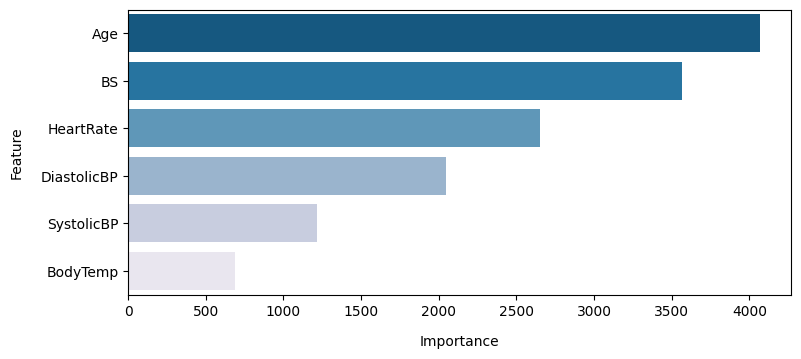

In [17]:
best_lgb_model = random_search.best_estimator_
lgb_model = LGBMClassifier()

feature_importances = best_lgb_model.feature_importances_

# Create a DataFrame for plotting with seaborn
importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot feature importances with seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df, palette='PuBu_r')
plt.tight_layout()
plt.subplots_adjust(bottom=0.5)
plt.ylabel('Feature', labelpad=12)
plt.xlabel('Importance', labelpad=12)
plt.savefig("importance.png", format='png', dpi=300)
plt.show()